# Preprocessing

### Imports

In [2]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/newmanw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/newmanw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading CSV Data

In [3]:
df = pd.read_csv('enron_spam_data.csv')
df.head()

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14


### Checking for missing values

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

df.dropna(subset=["Message", "Spam/Ham", "Subject"], inplace=True)

print("\nAfter:")
print(df.isnull().sum())

Missing values per column:
Message ID      0
Subject       289
Message       371
Spam/Ham        0
Date            0
dtype: int64

After:
Message ID    0
Subject       0
Message       0
Spam/Ham      0
Date          0
dtype: int64


In [5]:
# Display the first few rows of the cleaned DataFrame
df.head()

,Message ID,Subject,Message,Spam/Ham,Date
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
5,5,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,1999-12-14


# Tokenization and Text Processing

In [6]:
def processMessage(message):
    message = message.lower()
    message = word_tokenize(message)
    message = [word.strip() for word in message]
    message = [word.replace("\n", "") for word in message]
    message = [re.sub(r"\d+", "", word) for word in message]
    message = [re.sub(r"[^a-zA-Z0-9\s]", "", word) for word in message]
    stop_words = set(stopwords.words("english"))
    message = [word for word in message if word not in stop_words]
    ps = PorterStemmer()
    message = [ps.stem(word) for word in message]
    return " ".join(message)

In [7]:
df["Message"] = df["Message"].apply(processMessage)

In [8]:
print(df.isnull().sum())

print("Missing values in Spam/Ham after:")
print(df["Spam/Ham"].isnull().sum())

Message ID    0
Subject       0
Message       0
Spam/Ham      0
Date          0
dtype: int64
Missing values in Spam/Ham after:
0


### Relabeling Data

In [9]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["Message"])
y = df["Spam/Ham"]
# Label spam/ham as 1/0, respectively
df["Spam/Ham"] = df["Spam/Ham"].apply(lambda x: 1 if x == "spam" else 0)
print(y)

1         ham
2         ham
3         ham
4         ham
5         ham
         ... 
33711    spam
33712    spam
33713    spam
33714    spam
33715    spam
Name: Spam/Ham, Length: 33107, dtype: object


### Set up Data for Training

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Ensure 'y' does not contain any NaN values
print("Missing values in 'y' after encoding:")
print(y.isnull().sum())

Missing values in 'y' after encoding:
0


# Model Evaluation

In [12]:
# Initialize the Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Test Output:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.9832376925400181
F1 Score: 0.983237717386819


Confusion Matrix (not normalized):
 [[3249   58]
 [  53 3262]]


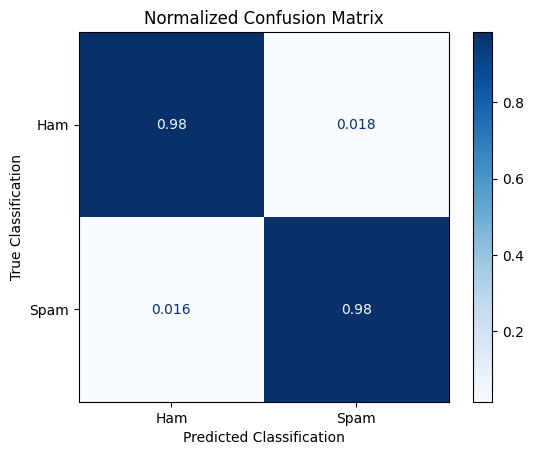

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# plotting the confusion matrix, adapted from scikit-learn documentation
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (not normalized):\n", cm)

cm = confusion_matrix(y_test, y_pred, normalize = "true")
cmDisplay = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Ham", "Spam"])
cmDisplay.plot(cmap = plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Classification")
plt.ylabel("True Classification")
plt.show()

# EXPORT

In [15]:
import joblib
joblib.dump(model, filename = "nb_model.pkl")

['nb_model.pkl']